In this example:

We load the marketing campaign data into a DataFrame.
We inspect the data for missing values and data types.
We clean the data (assuming there are no missing values or duplicates).
We transform the 'Date' column into a datetime format and calculate CTR as a new feature.
We perform exploratory data analysis (EDA) by visualizing the CTR distribution and analyzing CTR by device type.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (replace 'email_data.csv' with your actual data file)
df = pd.read_csv('marketing_campaign_dataset.csv')

In [3]:
# Data Inspection
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [4]:
# Calculate the total count of missing values for each variable
total_missing = df.isnull().sum()

# Calculate the percentage of missing values for each variable
percent_missing = (total_missing * 100) / df.isnull().count()
percent_missing = percent_missing.round(decimals=0)  # Round the percentage values

# Create a DataFrame to store the missing data information
missing_data = pd.DataFrame({
    'Total': total_missing,
    'Percentage of Missing Values': percent_missing,
    'Type': df.dtypes
})

# Sort the DataFrame based on the total count of missing values in descending order
missing_data = missing_data.sort_values(by='Total', ascending=False)

missing_data

,Total,Percentage of Missing Values,Type
Campaign_ID,0,0.0,int64
Company,0,0.0,object
Campaign_Type,0,0.0,object
Target_Audience,0,0.0,object
Duration,0,0.0,object
Channel_Used,0,0.0,object
Conversion_Rate,0,0.0,float64
Acquisition_Cost,0,0.0,object
ROI,0,0.0,float64
Location,0,0.0,object


In [8]:
# Data Transformation
# Assuming 'Timestamp' is in a string format, we convert it to datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Feature Engineering
# Calculate CTR and add it as a new column
df['CTR'] = df['Clicks'] / df['Impressions'] * 100

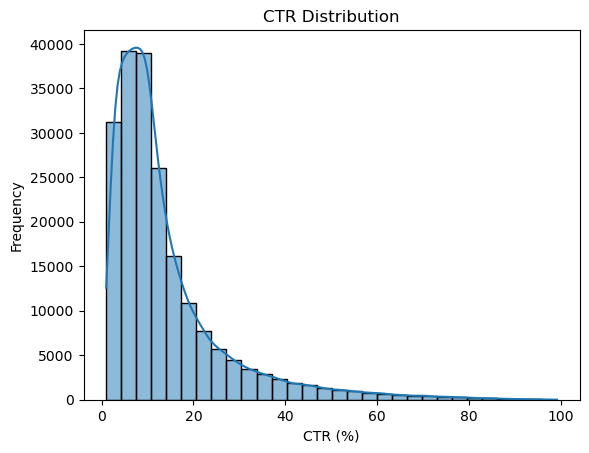

In [10]:
# EDA (Exploratory Data Analysis)
# Visualize CTR distribution
sns.histplot(df['CTR'], bins=30, kde=True)
plt.title('CTR Distribution')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.show()